In [20]:
!pip install tensorflow

In [22]:
!pip install numpy pandas matplotlib scikit-learn

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam


In [33]:
df = pd.read_csv(r'E:\code alpha\code-alpha-task-2-main\AAPL.csv')

print("First 5 rows of the dataset:")
print(df.head())




First 5 rows of the dataset:
   Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   307

In [34]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


In [35]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)


In [36]:
data = df[['close']].values


In [37]:
training_data_len = int(np.ceil(len(data) * 0.8))


In [38]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [40]:
train_data = np.random.rand(1000, 1)  
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, Y_train = create_dataset(train_data, time_step) 


In [41]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


In [42]:
test_data = scaled_data[training_data_len - time_step:, :]
X_test, Y_test = create_dataset(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [43]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


C:\Users\eswar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [45]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=50, validation_data=(X_test, Y_test))


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.1737 - val_loss: 0.0500
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0973 - val_loss: 0.0072
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0889 - val_loss: 0.0246
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0883 - val_loss: 0.0244
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0916 - val_loss: 0.0155
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0897 - val_loss: 0.0283
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0924 - val_loss: 0.0343
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0867 - val_loss: 0.0224
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0908 - val_loss: 0.0438
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0909 - val_loss: 0.0524
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0964 - val_loss: 0.0406
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.

In [46]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


In [47]:
actual_prices = data[training_data_len:, :]
valid = df[training_data_len:].reset_index(drop=True)
valid['Predictions'] = predictions


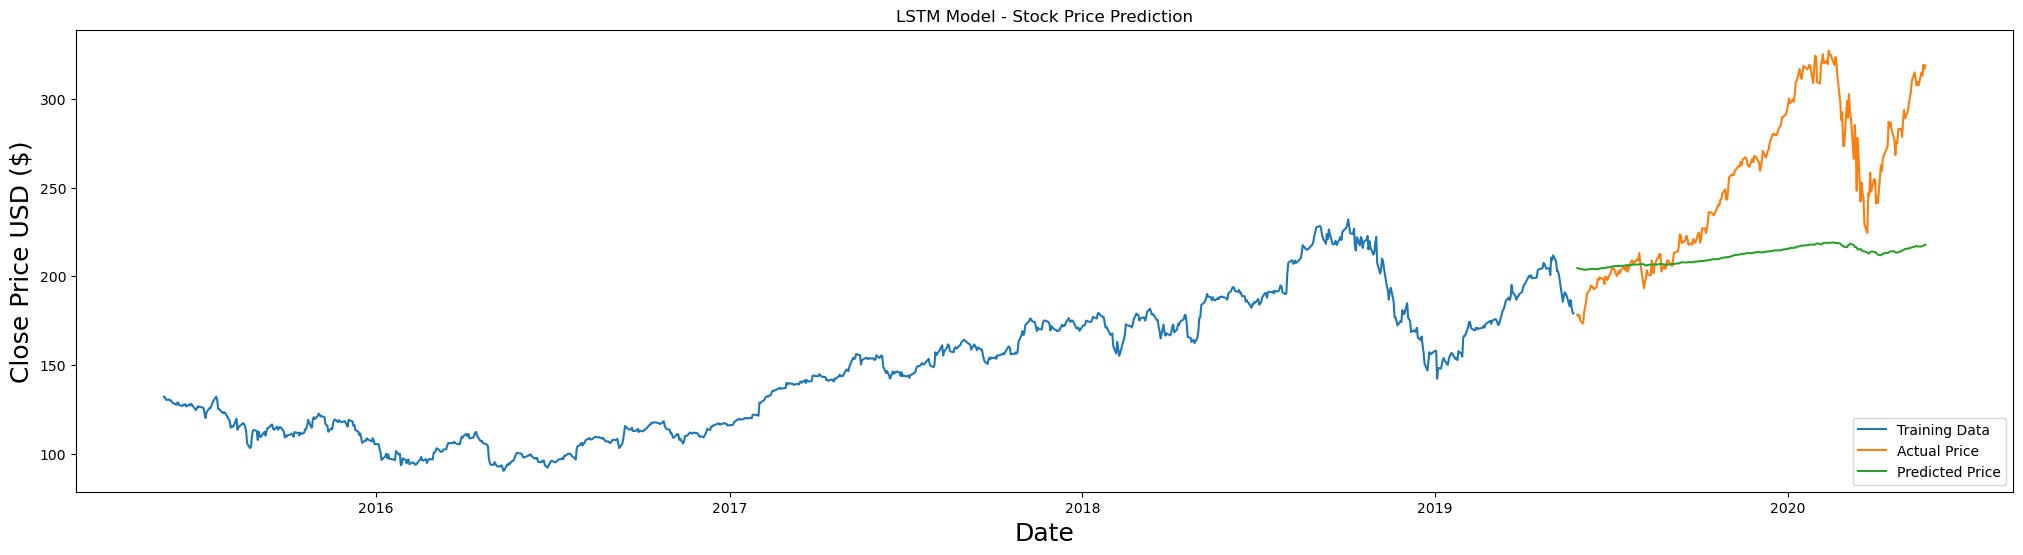

In [49]:
plt.figure(figsize=(25,6))
plt.title('LSTM Model - Stock Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df['date'][:training_data_len], df['close'][:training_data_len], label='Training Data')
plt.plot(valid['date'], valid['close'], label='Actual Price')
plt.plot(valid['date'], valid['Predictions'], label='Predicted Price')
plt.legend(loc='lower right')
plt.show()


In [50]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(valid['close'], valid['Predictions']))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 56.07998904907007


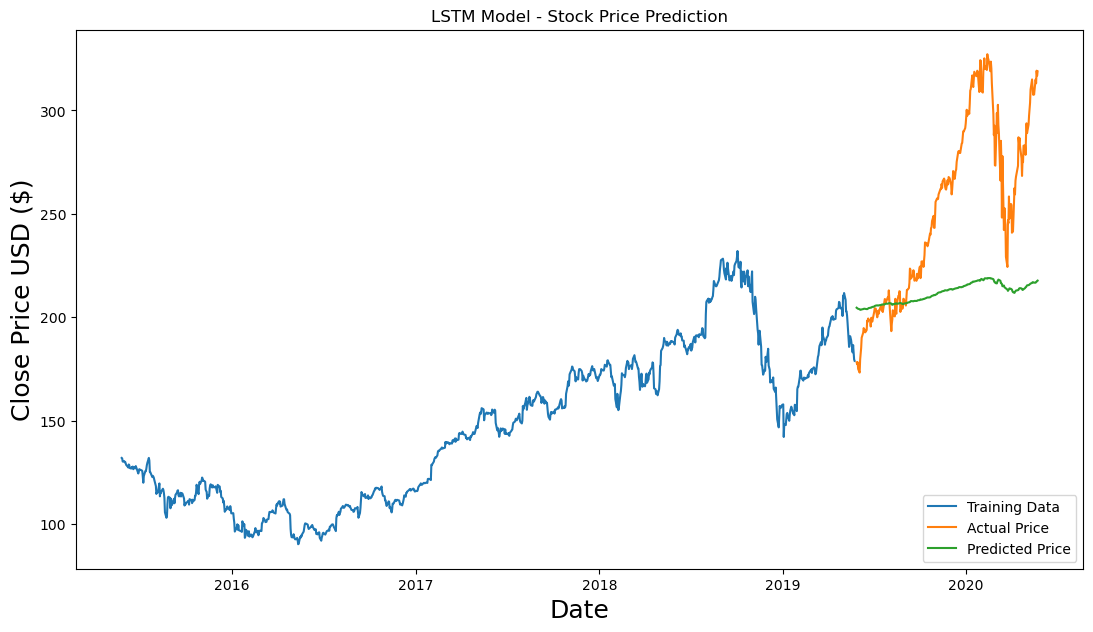

In [54]:
plt.figure(figsize=(13,7))
plt.title('LSTM Model - Stock Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df['date'][:training_data_len], df['close'][:training_data_len], label='Training Data')
plt.plot(valid['date'], valid['close'], label='Actual Price')
plt.plot(valid['date'], valid['Predictions'], label='Predicted Price')
plt.legend(loc='lower right')
plt.show()
